In [24]:
import sys
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
data = pd.read_csv('adult.data')
data.to_csv("mydata.csv", index=False, header=False)
df = data.apply(lambda x:pd.Series(x))


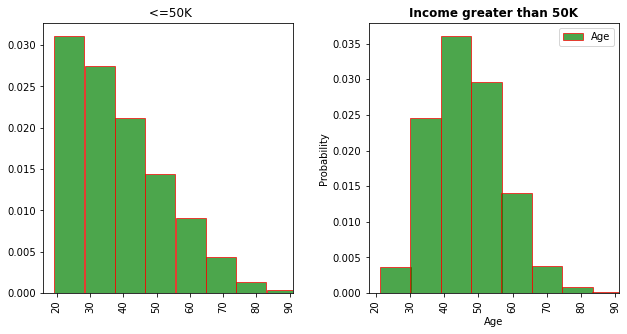

In [54]:


data=df.iloc[:,[0,14]]
data.columns=['Age','Income']
Age = df.iloc[:, 0]
cm = plt.cm.get_cmap('RdYlBu_r')
n = data.hist(by=data['Income'],density=True,label="Age",figsize=(10,5),align='mid',
bins=8,ec="red",alpha=0.7,width=9,rwidth=0.5,color='green', stacked=False)
plt.legend(loc="upper right")
plt.ylabel('Probability')
plt.xlabel('Age')
plt.title("Income greater than 50K",weight='bold',size=12);


(10, 20]    2410
(20, 30]    8162
(30, 40]    8545
(40, 50]    6983
(50, 60]    4128
(60, 70]    1792
(70, 80]     441
(80, 90]      99
Name: Age, dtype: int64
age_group    Income
Under 20      <=50K    2408
              >50K        2
20 under 30   <=50K    7482
              >50K      680
30 under 40   <=50K    6139
              >50K     2406
40 under 50   <=50K    4328
              >50K     2655
50 under 60   <=50K    2581
              >50K     1547
60 under 70   <=50K    1335
              >50K      457
70 under 80   <=50K     361
              >50K       80
above 80      <=50K      85
              >50K       14
dtype: int64


Text(0, 0.5, 'Number of people')

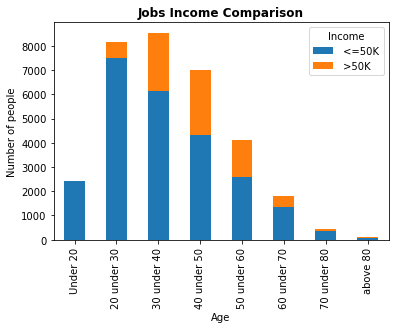

In [106]:

data = df.iloc[:, [0, 14]]
data.columns =['Age', 'Income']

#fig = plt.figure(figsize=(10,15))

Age = df.iloc[:,0]
res = data.groupby(['Age','Income']).size()
bins = (10, 20, 30, 40, 50, 60, 70,80,90)
s=pd.cut(data['Age'], bins=bins).value_counts(sort=False)
print(s)

labels = ['Under 20','20 under 30', '30 under 40', '40 under 50', '50 under 60','60 under 70', '70 under 80', 'above 80']



data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels)
data['age_group']

aa = data.groupby(['age_group','Income']).size()
print(aa)

data.groupby(['age_group', 'Income']).size().unstack().plot(kind='bar', stacked=True)


plt.title('Jobs Income Comparison', weight='bold', size=12)

plt.xlabel('Age')
plt.ylabel('Number of people')

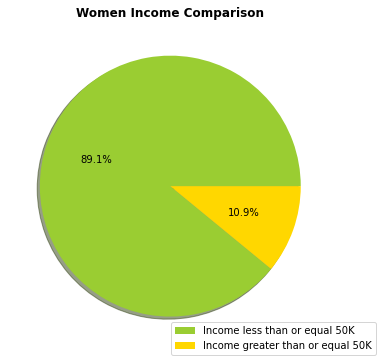

In [9]:
data = df.iloc[:, [9, 14]]
data.columns =['Sex', 'Income']
Sex = df.iloc[:,9]
res = data.groupby(['Sex','Income']).size()
unstacked_sex = data.groupby(['Sex','Income']).size().unstack('Income')
labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
colors = ['yellowgreen', 'gold']
data[data['Sex']==' Female'].groupby(["Sex","Income"]).size().plot.pie(autopct='%1.1f%%',figsize=(6,6), label='',labeldistance=None,colors=colors,shadow=True)
plt.title('Women Income Comparison', weight='bold', size=12)
plt.legend( bbox_to_anchor=(1,0.2), loc="upper right", fontsize=10, bbox_transform=plt.gcf().transFigure,labels=labels)




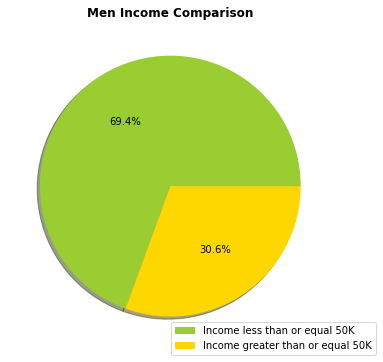

In [10]:
data[data['Sex']==' Male'].groupby(["Sex","Income"]).size().plot.pie(autopct='%1.1f%%',figsize=(6,6), label='',labeldistance=None,colors=colors,shadow=True)
plt.title('Men Income Comparison', weight='bold', size=12)
labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
plt.legend( bbox_to_anchor=(1,0.2), loc="upper right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure,labels=labels)

Text(0, 0.5, 'Number of people')

<Figure size 720x1080 with 0 Axes>

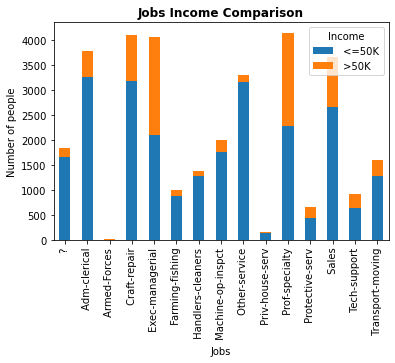

In [5]:
data = df.iloc[:, [6, 14]]
data.columns =['Jobs', 'Income']

fig = plt.figure(figsize=(10,15))

Jobs = df.iloc[:,6]

res = data.groupby(['Jobs','Income']).size()
data.groupby(['Jobs', 'Income']).size().unstack().plot(kind='bar', stacked=True)

plt.title('Jobs Income Comparison', weight='bold', size=12)

plt.xlabel('Jobs')
plt.ylabel('Number of people')



Income,<=50K,>50K
Jobs,,
Adm-clerical,86.548156,13.451844
Armed-Forces,88.888889,11.111111
Craft-repair,77.335936,22.664064
Exec-managerial,51.598623,48.401377
Farming-fishing,88.430584,11.569416
Handlers-cleaners,93.722628,6.277372
Machine-op-inspct,87.512488,12.487512
Other-service,95.842185,4.157815
Priv-house-serv,99.328859,0.671141


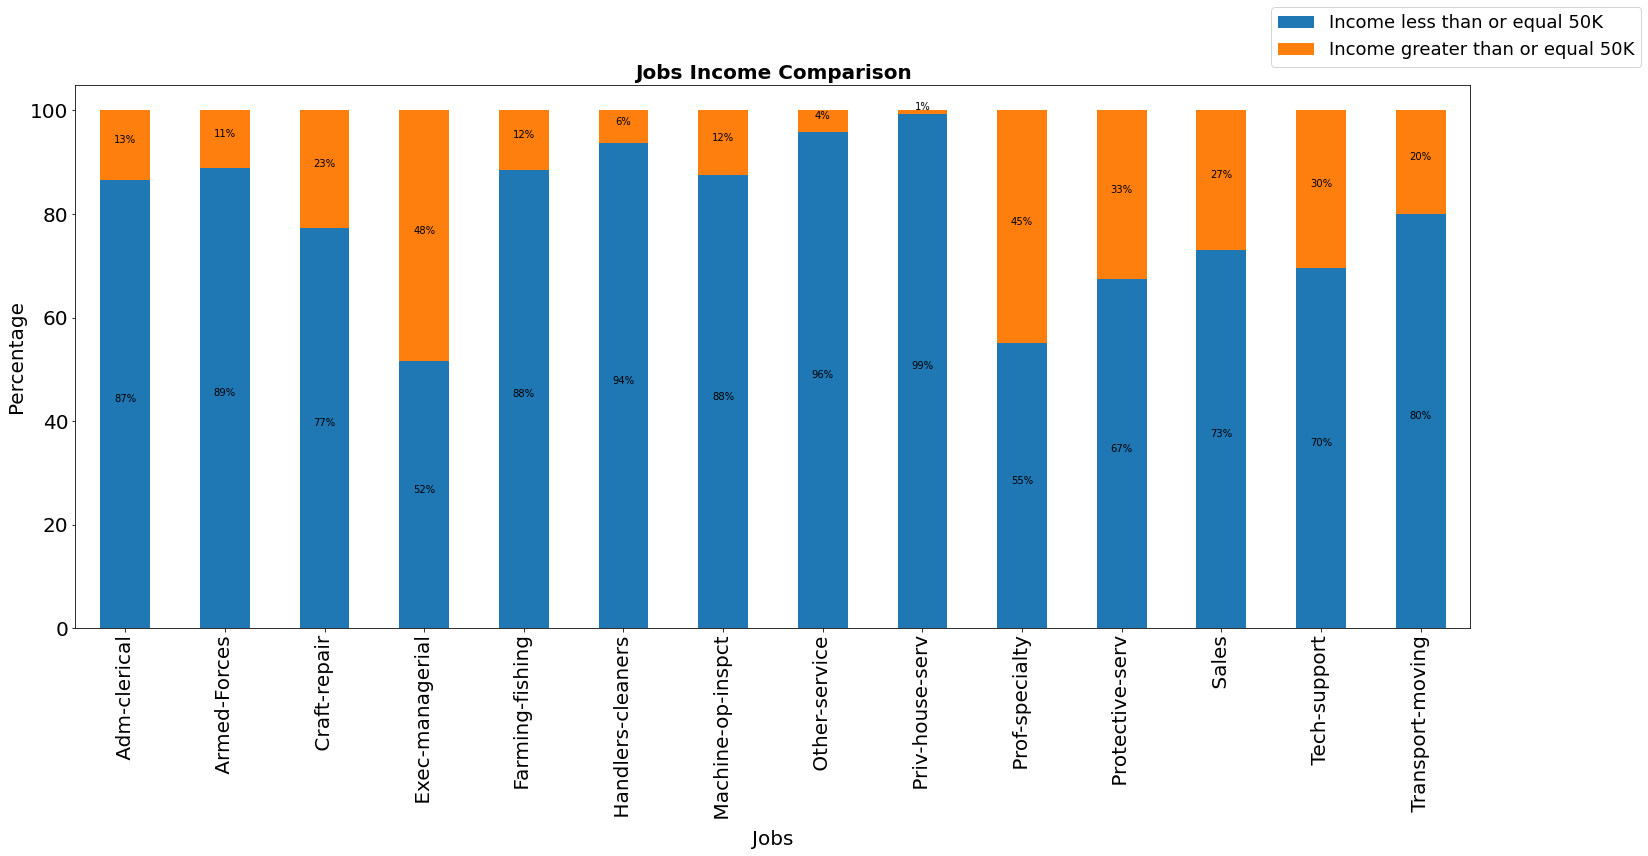

In [133]:
data = df.iloc[:, [6, 14]]
data.columns =['Jobs', 'Income']
Jobs = df.iloc[:,6]
data = data[data.Jobs != " ?"]
ax= pd.crosstab(data['Jobs'], data['Income']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(25,10),stacked=True, rot=0 )
display(ax)
plt.title('Jobs Income Comparison', weight='bold', size=20)
plt.xlabel('Jobs',size=20)
labels=['Income less than or equal 50K', 'Income greater than or equal 50K']
plt.ylabel('Percentage',size=20)
plt.legend( bbox_to_anchor=(1,1), loc="upper right", fontsize=18, bbox_transform=plt.gcf().transFigure,labels=labels)
plt.rc('xtick',labelsize=20)
plt.xticks(rotation=90)
plt.rc('ytick',labelsize=20)
for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

          
